In [1]:
import warnings # suppress warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import gc
import glob
import random

import numpy as np 
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from scipy import stats
from pathlib import Path

import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline
!ls ../input/*

sample_submission.csv  submission_files  train_labels.csv


In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

<div class="alert alert-success">  
</div>

(0    10000
 1    10000
 Name: label, dtype: int64,
 0    0.5
 1    0.5
 Name: label, dtype: float64)

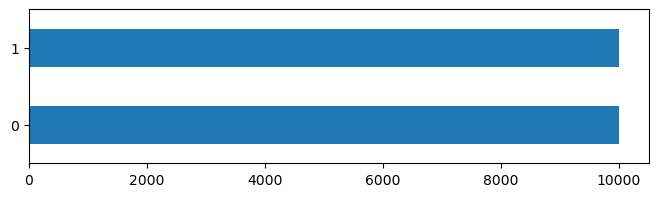

In [4]:
labels = pd.read_csv('../input/tabular-playground-series-nov-2022/train_labels.csv', index_col='id')
y = labels['label']

y.value_counts().plot(kind='barh', figsize=(8,2))
y.value_counts(), y.value_counts(normalize=True) 

In [5]:
path_files = '../input/tabular-playground-series-nov-2022/submission_files/*.csv'

path_list  = sorted(glob.glob(path_files), reverse=True)
len(path_list), path_list[0], '...', path_list[-1]

(5000,
 '../input/tabular-playground-series-nov-2022/submission_files/0.7575039918.csv',
 '...',
 '../input/tabular-playground-series-nov-2022/submission_files/0.6222863195.csv')

In [6]:
sub  = pd.read_csv(path_list[0])
loss = log_loss(y, sub['pred'][:20000])
loss

0.7608130420611576

<div class="alert alert-success">  
</div>

#### I try all samples with initial coefficients.

In [7]:
for n in range(1,5000):
    subn = pd.read_csv(path_list[n])
    subn['pred'] = (sub['pred'] * 0.75) + (subn['pred'] * 0.25)
    lossn = log_loss(y, subn['pred'][:20000])
    
    if (loss > lossn):
        loss = lossn
        sub  = subn 
        print(loss, ' >>> ', n)
        
    gc.collect()    

0.6752684308665582  >>>  1
0.6708999885165009  >>>  2
0.6692116292699984  >>>  15
0.6592497439535269  >>>  24
0.6230656255124676  >>>  64
0.6222063637904048  >>>  652
0.6066510911685177  >>>  1455
0.6059709344379473  >>>  2100
0.5938720165552582  >>>  2585
0.5913524089944742  >>>  2606
0.5891394939048911  >>>  3228
0.5878742628061122  >>>  3244
0.5819488636563264  >>>  3781
0.5810973806588632  >>>  4428
0.5810518595443498  >>>  4709
0.5802167611606645  >>>  4909
0.5779218000162994  >>>  4910
0.5748401344566717  >>>  4949
0.5740283807974552  >>>  4950
0.5706700707065547  >>>  4971


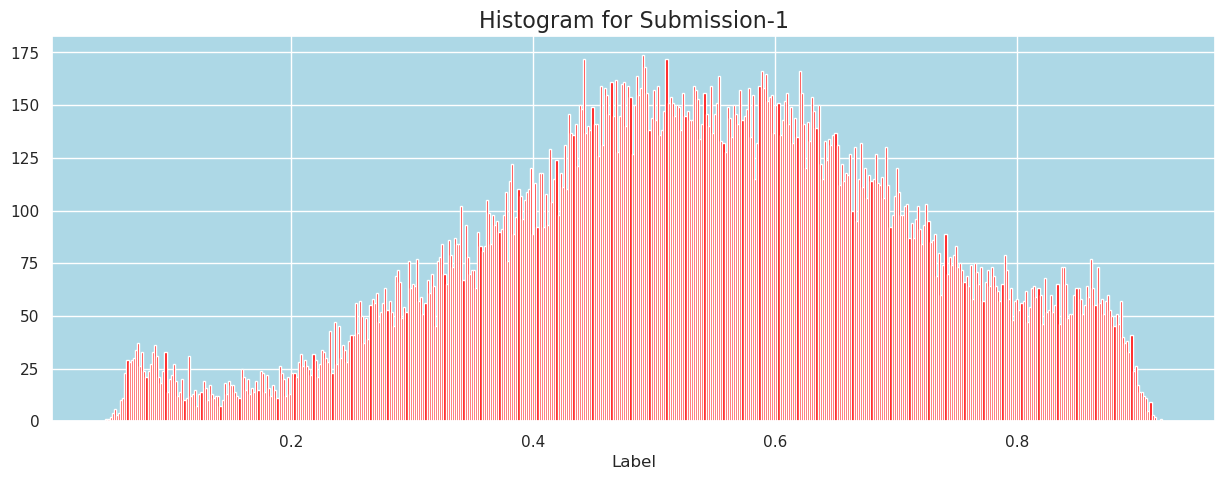

Mean Value: 0.5364213772222475


In [8]:
sns.set()
plt.figure(figsize=(15, 5))
plt.gca().set_facecolor('lightblue')
plt.hist(sub['pred'], bins=500, color='red')
    
plt.xlabel('Label')
plt.title('Histogram for Submission-1', fontsize=16)
plt.show() 

print('Mean Value:', sub['pred'].mean())

#### It seems that the mean value should decrease.

In [9]:
path_sample = '../input/tabular-playground-series-nov-2022/sample_submission.csv'

submission1 = pd.read_csv(path_sample)
submission1['pred'] = sub['pred'][20000:].values

sub.to_csv('sub1.csv', index=False)
submission1.to_csv('submission1.csv', index=False)
!ls

__notebook_source__.ipynb  sub1.csv  submission1.csv


<div class="alert alert-success">  
</div>

#### A section of samples with smaller coefficients plus the effect of decreasing values.

In [10]:
NUMBER = 5 # The number of iteration
NOISE  = random.randrange(-10,0)/1000

for i in range(NUMBER):
    print('------------------------------')
    print('The number of iteration:', i)
    split = random.randrange(5000)
    
    for n in range(split,5000):
        subn = pd.read_csv(path_list[n])
        subn['pred'] = (sub['pred'] * 0.85) + (subn['pred'] * 0.15) + NOISE
        lossn = log_loss(y, subn['pred'][:20000])
        
        if (loss > lossn):
            loss = lossn
            sub  = subn 
            print(loss, ' >>> ', n)
            
        gc.collect()          
print('------------------------------')

------------------------------
The number of iteration: 0
0.570008047441305  >>>  3244
0.5686376072816857  >>>  3873
0.5681443191750372  >>>  4428
0.5677972689417636  >>>  4969
0.5674005125179716  >>>  4971
0.5673257537350123  >>>  4977
0.5670869754376701  >>>  4997
------------------------------
The number of iteration: 1
0.5654452669024372  >>>  2585
0.5645372990448972  >>>  3244
0.5642819771868036  >>>  4391
0.5637092109633156  >>>  4428
------------------------------
The number of iteration: 2
------------------------------
The number of iteration: 3
------------------------------
The number of iteration: 4
------------------------------


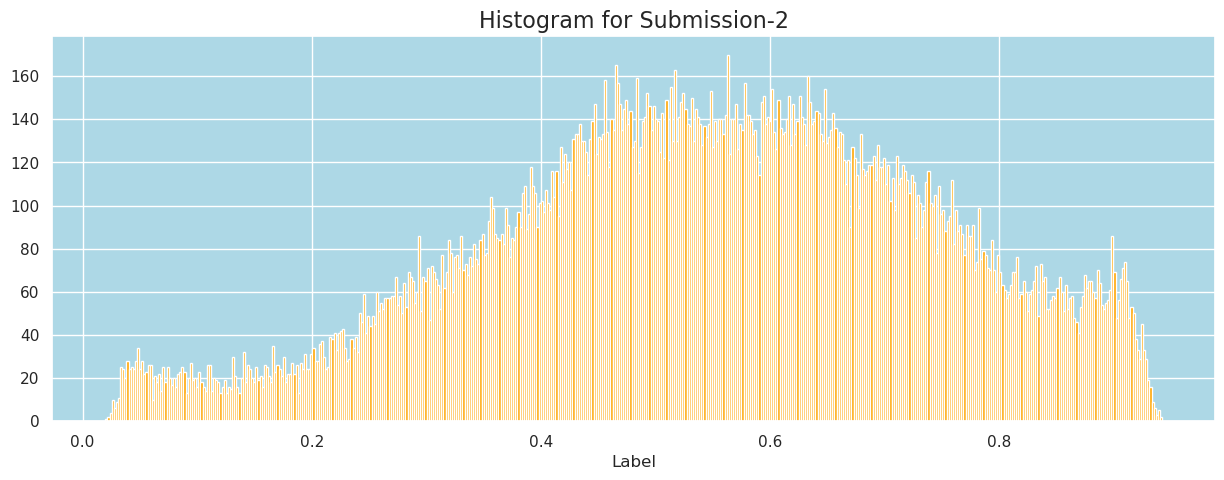

Mean Value: 0.5451635323851848


In [11]:
sns.set()
plt.figure(figsize=(15, 5))
plt.gca().set_facecolor('lightblue')
plt.hist(sub['pred'], bins=500, color='orange')
    
plt.xlabel('Label')
plt.title('Histogram for Submission-2', fontsize=16)
plt.show() 

print('Mean Value:', sub['pred'].mean())

In [12]:
submission2 = pd.read_csv(path_sample)
submission2['pred'] = sub['pred'][20000:].values

sub.to_csv('sub2.csv', index=False)
submission2.to_csv('submission2.csv', index=False)
!ls

__notebook_source__.ipynb  sub1.csv  sub2.csv  submission1.csv	submission2.csv


<div class="alert alert-success">  
</div>

#### A section of samples with smaller coefficients plus the effect of decreasing values.

In [13]:
NUMBER = 5 # The number of iteration
NOISE  = random.randrange(-10,0)/1000

for i in range(NUMBER):
    print('------------------------------')
    print('The number of iteration:', i)
    split = random.randrange(5000)
    
    for n in range(split,5000):
        subn = pd.read_csv(path_list[n])
        subn['pred'] = (sub['pred'] * 0.90) + (subn['pred'] * 0.10) + NOISE
        lossn = log_loss(y, subn['pred'][:20000])
        
        if (loss > lossn):
            loss = lossn
            sub  = subn 
            print(loss, ' >>> ', n)
        
        gc.collect()          
print('------------------------------')

------------------------------
The number of iteration: 0
0.5636929197733789  >>>  4842
0.5634760198242191  >>>  4909
0.563397191824891  >>>  4910
0.5629765302659699  >>>  4971
------------------------------
The number of iteration: 1
0.5627752906884896  >>>  4842
0.562615260794698  >>>  4976
0.5625520490758517  >>>  4997
------------------------------
The number of iteration: 2
0.5624935622206039  >>>  4391
0.5622354251881881  >>>  4428
0.5622184666040364  >>>  4905
0.5621888570100435  >>>  4976
------------------------------
The number of iteration: 3
0.5619950444125916  >>>  4842
------------------------------
The number of iteration: 4
0.5611206603778133  >>>  2585
0.560943454238203  >>>  3244
------------------------------


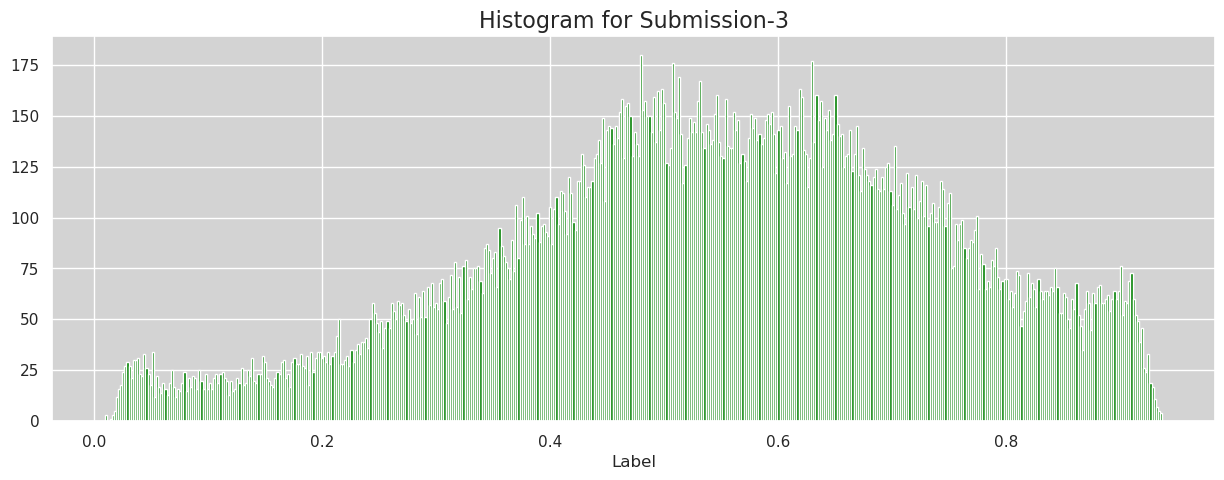

Mean Value: 0.5444279440939581


In [14]:
sns.set()
plt.figure(figsize=(15, 5))
plt.gca().set_facecolor('lightgray')
plt.hist(sub['pred'], bins=500, color='green')
    
plt.xlabel('Label')
plt.title('Histogram for Submission-3', fontsize=16)
plt.show() 

print('Mean Value:', sub['pred'].mean())

In [15]:
submission3 = pd.read_csv(path_sample)
submission3['pred'] = sub['pred'][20000:].values

sub.to_csv('sub3.csv', index=False)
submission3.to_csv('submission3.csv', index=False)
!ls

__notebook_source__.ipynb  sub2.csv  submission1.csv  submission3.csv
sub1.csv		   sub3.csv  submission2.csv


<div class="alert alert-success">  
</div>

#### More iteration to hunt reality.

In [16]:
NUMBER = 10 # The number of iteration
NOISE  = random.randrange(-10,0)/1000

for i in range(NUMBER):
    print('------------------------------')
    print('The number of iteration:', i)
    split = random.randrange(5000)
    
    for n in range(split,5000):
        subn = pd.read_csv(path_list[n])
        subn['pred'] = (sub['pred'] * 0.95) + (subn['pred'] * 0.05) + NOISE   
        lossn = log_loss(y, subn['pred'][:20000])
        
        if (loss > lossn):
            loss = lossn
            sub  = subn 
            print(loss, ' >>> ', n)
        
        gc.collect()          
print('------------------------------')

------------------------------
The number of iteration: 0
0.5606224481066752  >>>  2585
0.5603611968076321  >>>  3244
0.5602612909396482  >>>  3873
0.5601947636249043  >>>  4334
0.560175042357383  >>>  4428
0.5601171600639312  >>>  4813
0.5600416335563743  >>>  4842
0.5597882727039987  >>>  4909
0.559611527783974  >>>  4910
0.5594317153532881  >>>  4919
0.5591927218141792  >>>  4969
0.5586297824877386  >>>  4971
0.5586099193444406  >>>  4976
0.5584840658278268  >>>  4977
0.5583506709162933  >>>  4997
------------------------------
The number of iteration: 1
0.5582666845595795  >>>  4391
0.5581466960060748  >>>  4428
0.5581065035343543  >>>  4598
0.5580236233493119  >>>  4842
0.557961202708358  >>>  4919
0.5576078527384206  >>>  4971
------------------------------
The number of iteration: 2
0.5575206506801645  >>>  4391
0.5575059398677831  >>>  4428
0.5574878340250708  >>>  4813
0.5574754518242083  >>>  4910
0.5574067608640574  >>>  4971
0.5574025622170091  >>>  4997
-------------------

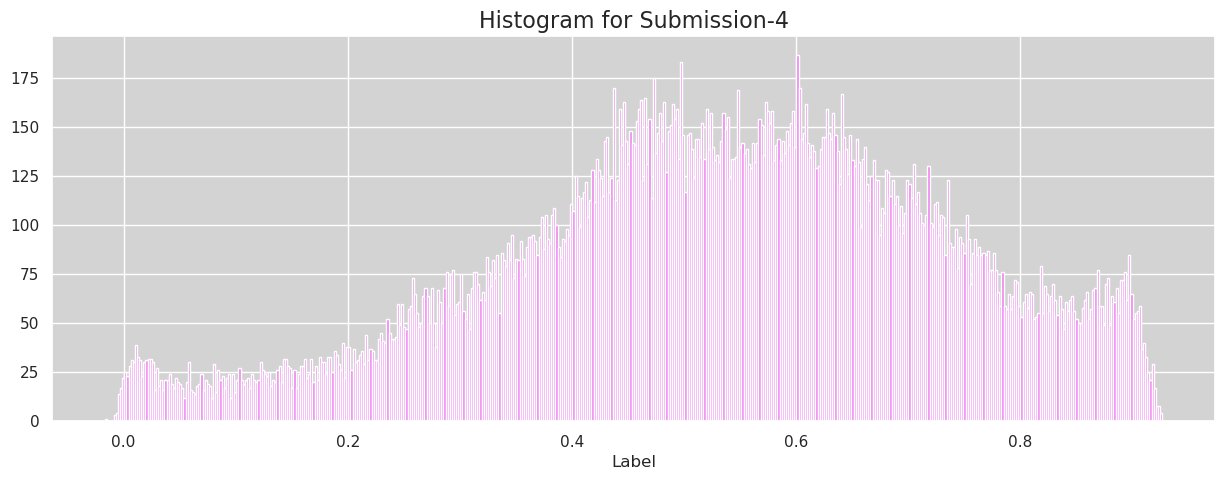

Mean Value: 0.5312341009896512


In [17]:
sns.set()
plt.figure(figsize=(15, 5))
plt.gca().set_facecolor('lightgray')
plt.hist(sub['pred'], bins=500, color='violet')
    
plt.xlabel('Label')
plt.title('Histogram for Submission-4', fontsize=16)
plt.show() 

print('Mean Value:', sub['pred'].mean())

In [18]:
submission4 = pd.read_csv(path_sample)
submission4['pred'] = sub['pred'][20000:].values

sub.to_csv('sub4.csv', index=False)
submission4.to_csv('submission4.csv', index=False)
!ls

__notebook_source__.ipynb  sub3.csv	    submission2.csv
sub1.csv		   sub4.csv	    submission3.csv
sub2.csv		   submission1.csv  submission4.csv


<div class="alert alert-success">  
</div>

#### See the improvement of the results at a glance.

In [19]:
hist_data = [submission4.iloc[:,1], submission3.iloc[:,1], submission2.iloc[:,1], submission1.iloc[:,1]]
group_labels = ['Submission-4', 'Submission-3', 'Submission-2', 'Submission-1']
    
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False)
fig.show() 